In [5]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

##데이터 읽어 들이기
mr = pd.read_csv('C:\\Users\\004\\Desktop\\ML\\sample.csv', header=0, encoding='cp949')
mr

,status,height,weight,color
0,먹어,7,2,1
1,먹지마,1,5,3
2,먹지마,5,1,4
3,먹어,1,1,7
4,먹지마,1,6,7
5,먹지마,6,2,1
6,먹지마,3,1,5
7,먹지마,1,4,9
8,먹어,2,1,1
9,먹지마,5,7,6


In [6]:
## 데이터를 label과 data로 분리하기

label = []
data = []
for row_index, row in mr.iterrows():
    label.append(row.iloc[0])
    row_data = []
    for v in row.iloc[1:]:
        row_data.append(v)
    data.append(row_data)

In [8]:
label[0:5]

['먹어', '먹지마', '먹지마', '먹어', '먹지마']

In [9]:
data_train, data_test, label_train, label_test = train_test_split(data, label)

In [10]:
data_train

[[4, 1, 10],
 [5, 1, 4],
 [5, 7, 6],
 [6, 2, 1],
 [1, 1, 7],
 [1, 6, 7],
 [3, 8, 3],
 [1, 1, 1],
 [2, 1, 3],
 [1, 4, 9],
 [2, 1, 1],
 [2, 1, 3]]

In [11]:
data_test

[[4, 2, 4], [3, 1, 5], [7, 2, 1], [1, 5, 3]]

In [12]:
label_train

['먹지마',
 '먹지마',
 '먹지마',
 '먹지마',
 '먹어',
 '먹지마',
 '먹어',
 '먹지마',
 '먹지마',
 '먹지마',
 '먹어',
 '먹지마']

In [13]:
label_test

['먹지마', '먹지마', '먹어', '먹지마']

In [14]:
### 데이터 학습시키기

clf = RandomForestClassifier()
clf.fit(data_train, label_train)

## 모델 저장하기
joblib.dump(clf, 'C:\\Users\\004\\Desktop\\ML\\model.pkl')

['C:\\Users\\004\\Desktop\\ML\\model.pkl']

In [15]:
predict = clf.predict(data_test)
data_test

[[4, 2, 4], [3, 1, 5], [7, 2, 1], [1, 5, 3]]

In [17]:
as_score = metrics.accuracy_score(label_test, predict)
print("정확도 = ", as_score)
print("predict = ", predict)

정확도 =  0.75
predict =  ['먹지마' '먹지마' '먹지마' '먹지마']


In [71]:
import pandas as pd
import numpy as np
import dill as pickle
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import dill as pickle
import warnings

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from lightgbm import LGBMRegressor  
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew

In [23]:
#!pip install dill
#!pip install lightgbm
!pip install xgboost

In [116]:
data = pd.read_csv('C:\\Users\\004\\Desktop\\ML\\bmw.csv',header=0, encoding='cp949')
used_car = data.copy()
used_car = pd.DataFrame(used_car)
used_car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


<AxesSubplot:>

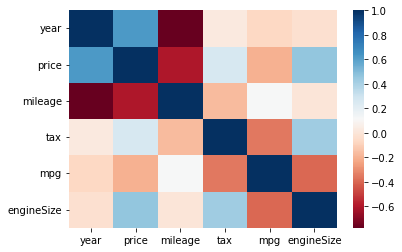

In [117]:
corr = used_car.corr()
sns.heatmap(corr, cmap="RdBu")

In [118]:
fig = px.scatter(used_car, x = 'model', y='price')
fig.show()

In [119]:
used_car[used_car['model'] == 'M4'].sort_values(by='price', ascending=False)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [122]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


C:\Users\004\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

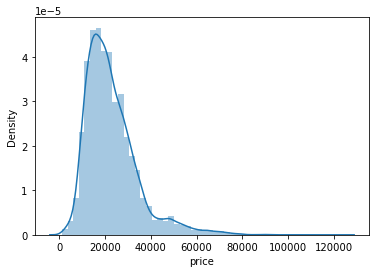

In [123]:
sns.distplot(used_car['price'])

In [124]:
temp = data.copy()
temp['price'] = np.log1p(temp['price'])

C:\Users\004\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

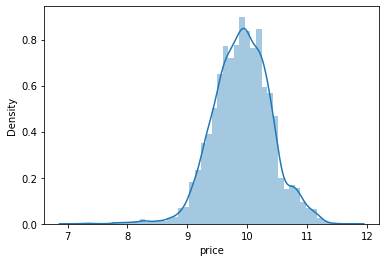

In [125]:
sns.distplot(temp['price'])

In [126]:
y_target = temp['price']

X_features = temp.drop('price', axis=1)

In [64]:
linear_reg = LinearRegression()
neg_mse = cross_val_score(linear_reg, X_features, y_target, scoring ='neg_mean_squared_error', cv=5)

r2_score = cross_val_score(linear_reg, X_features, y_target, scoring='r2', cv=5)
rmse = np.sqrt(-1 * neg_mse)
avg_rmse = np.mean(r2_score)

print(neg_mse)
#print("Linear_reg cv = 5의 평균 RMSE : {0:.3f}".format(avg_rmse))
#print("Linear_reg cv = 5의 r2_score : {0}".format(avg_r2_score))

[nan nan nan nan nan]


C:\Users\004\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\004\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\004\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._validate_data(
  File "C:\Users\004\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\004\anaconda3\lib\site-packages

In [127]:
model = temp['model']
price = temp['price']

X_train, X_test, y_train, y_test = train_test_split(model, price, test_size=7, random_state=156)

In [128]:
model

0         5 Series
1         6 Series
2         5 Series
3         1 Series
4         7 Series
           ...    
10776           X3
10777     5 Series
10778     3 Series
10779     1 Series
10780           X1
Name: model, Length: 10781, dtype: object

In [105]:
X_train

8625     2 Series
5680     1 Series
8692     3 Series
610      5 Series
6247     1 Series
          ...    
6955     2 Series
7653     5 Series
9634     3 Series
6860           X2
7724           X1
Name: model, Length: 10774, dtype: object

In [129]:
### 데이터 학습시키기

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

ValueError: could not convert string to float: ' 2 Series'

In [69]:
predict = clf.predict(data_test)
data_test

C:\Users\004\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



ValueError: could not convert string to float: ' 5 Series'

In [147]:
import seaborn as sns
import pandas as pd
sns.get_dataset_names()
df = sns.load_dataset('penguins')
df.head(5)

# df.isnull().sum()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [148]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [153]:
#df.cov()
#df.corr()

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

missing = missing_values_table(df)
missing

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,11,3.2
bill_length_mm,2,0.6
bill_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [155]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

df.iloc[:,:] = imputer.fit_transform(df)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

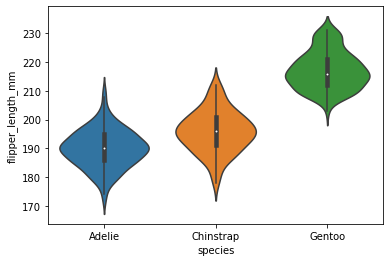

In [140]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=df,size=8)

C:\Users\004\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



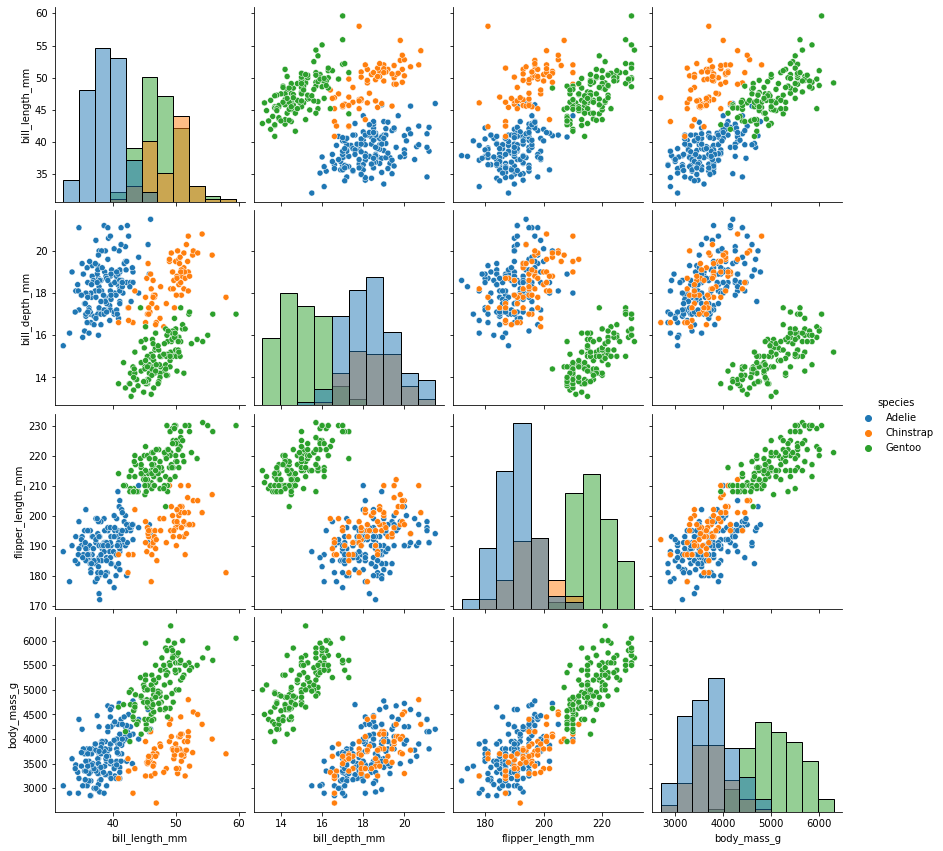

In [142]:
sns.pairplot(df, hue="species", size=3, diag_kind="hist")

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
